# Homework



In [61]:
# Update torch, torchvision and numpy
!pip install -U torch torchvision numpy opencv-python

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (4.2.0.34)


In [62]:
# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

--2020-05-20 15:51:51--  http://deeplearning.iit.bme.hu/CVS/HW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14446460 (14M) [application/zip]
Saving to: ‘HW.zip’

HW.zip              100%[===================>]  13.78M  9.26MB/s    in 1.5s    

2020-05-20 15:51:54 (9.26 MB/s) - ‘HW.zip’ saved [14446460/14446460]

--2020-05-20 15:51:57--  http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175675617 (168M) [application/zip]
Saving to: ‘trafficSignsHW.zip’

trafficSignsHW.zip  100%[===================>] 167.54M  19.2MB/s    in 9.4s    

2020-05-20 15:52:06 (17.8 MB/s) - ‘traff

In [63]:
# Install homework repository
!git clone https://github.com/szykry/CVML_HW.git

Cloning into 'CVML_HW'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 111 (delta 52), reused 48 (delta 14), pack-reused 0
Receiving objects: 100% (111/111), 59.99 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [64]:
# Set root folder
import os
name = "/content/CVML_HW/"
os.chdir(name)
!pwd

/content/CVML_HW


In [0]:
# Evaluation
from HW.evaluate import evaluate

# file = open('HW/annotations.pickle','rb')
# predictions = pickle.load(file)

evaluate(predictions)

NameError: ignored

# Tradition



In [0]:
# https://docs.opencv.org/4.3.0/d1/d1a/namespacecv_1_1cuda.html

# Tábla -> hough
# szegmentális
# cv.threshold

#OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline



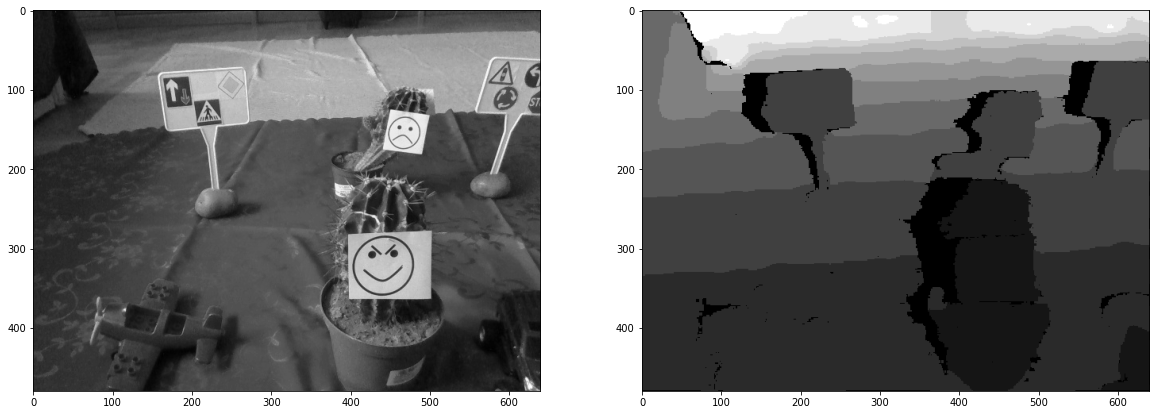

In [0]:
#OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

minVal=0.0
maxVal=0.0

img = cv2.imread("../HW/g3/rgb/1.jpg")   # 2.param: RGB, Grayscale, Bináriskép
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
minVal, maxVal, _, _ = cv2.minMaxLoc(img_gray)    # hol vannak a szélsőértékek
res=img_gray
cv2.convertScaleAbs(img_gray,res,255/(maxVal-minVal),-minVal)  # affin -> kép*alfa + béta

depth_img = cv2.imread("../HW/g3/depth/1.png")
depth_img_gray = cv2.cvtColor(depth_img, cv2.COLOR_BGR2GRAY)
minVal, maxVal, _, _ = cv2.minMaxLoc(depth_img_gray)    # hol vannak a szélsőértékek
depth_res=depth_img_gray
cv2.convertScaleAbs(depth_img_gray,depth_res,255/(maxVal-minVal),-minVal)  # affin -> kép*alfa + béta

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(res,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(depth_res,cmap='gray')


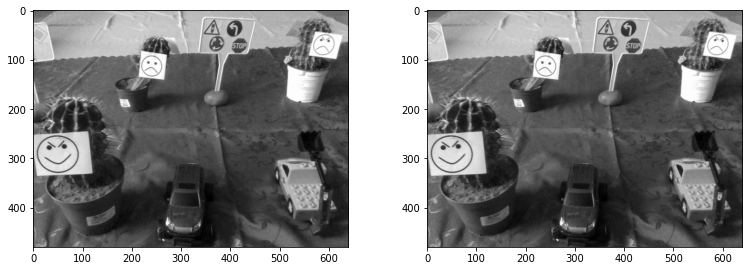

In [0]:

rowSubplot = 4
colSubplot = 3


plt.figure(figsize=(20,20))
imgBGR = cv2.imread("../HW/g3/rgb/136.jpg")
grayimg = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
minVal,maxVal,_,_ = cv2.minMaxLoc(grayimg)
plt.subplot(rowSubplot,colSubplot,1)
plt.imshow(grayimg,cmap='gray')

res=grayimg
cv2.convertScaleAbs(grayimg,res,255.0/(maxVal-minVal),-minVal)
plt.subplot(rowSubplot,colSubplot,2)
plt.imshow(res,cmap='gray')


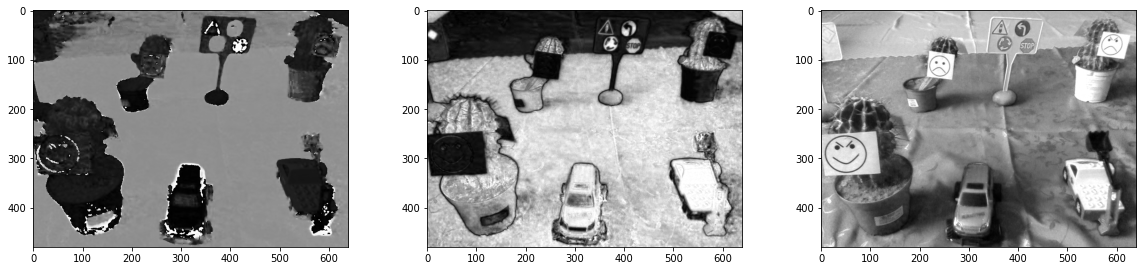

In [0]:

imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]
saturation_channel = imgHSV[:,:,1]
value_channel = imgHSV[:,:,2]
plt.figure(figsize=(20,20))
plt.subplot(rowSubplot,colSubplot,4)
plt.imshow(hue_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,5)
plt.imshow(saturation_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,6)
plt.imshow(value_channel,cmap='gray')


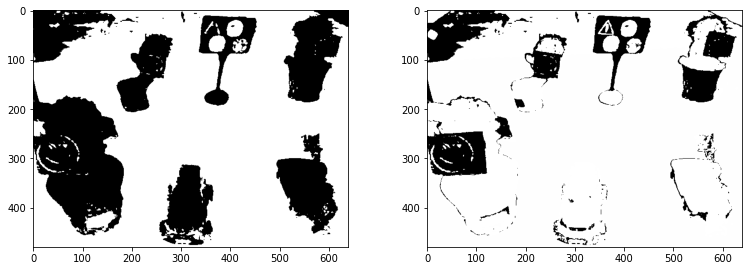

In [0]:

avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
plt.figure(figsize=(20,20))
plt.subplot(rowSubplot,colSubplot,10)
plt.imshow(hue_channel_segment,cmap='gray')

avg_saturation = np.average(saturation_channel)
saturation_channel_thresh, saturation_channel_segment = cv2.threshold(saturation_channel,(avg_saturation)/2,255,cv2.THRESH_BINARY)
plt.subplot(rowSubplot,colSubplot,11)
plt.imshow(saturation_channel_segment+hue_channel_segment,cmap='gray')


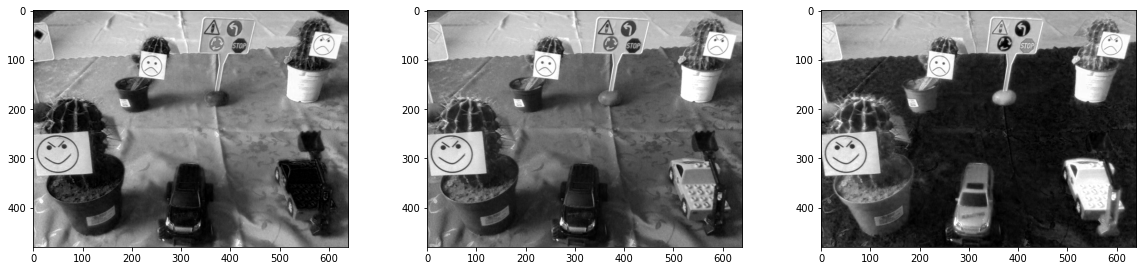

In [0]:

plt.figure(figsize=(20,20))

blue_channel = imgBGR[:,:,0]
green_channel = imgBGR[:,:,1]
red_channel = imgBGR[:,:,2]
plt.subplot(rowSubplot,colSubplot,7)
plt.imshow(blue_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,8)
plt.imshow(green_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,9)
plt.imshow(red_channel,cmap='gray')


In [0]:
# Get all subfolders in a directory
import os
path = name+"../HW/g3/rgb"
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]
print(myFolderList)

[]


In [0]:
# Get all files with extension in a directory
import glob
import re
 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
names = sorted_nicely(glob.glob1(path, "*.jpg"))
print(names)

['1.jpg', '65.jpg', '77.jpg', '136.jpg', '153.jpg', '189.jpg', '208.jpg', '225.jpg', '250.jpg', '278.jpg', '292.jpg', '307.jpg', '327.jpg', '340.jpg', '356.jpg', '376.jpg', '409.jpg', '420.jpg', '441.jpg']


In [0]:
# Class names
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

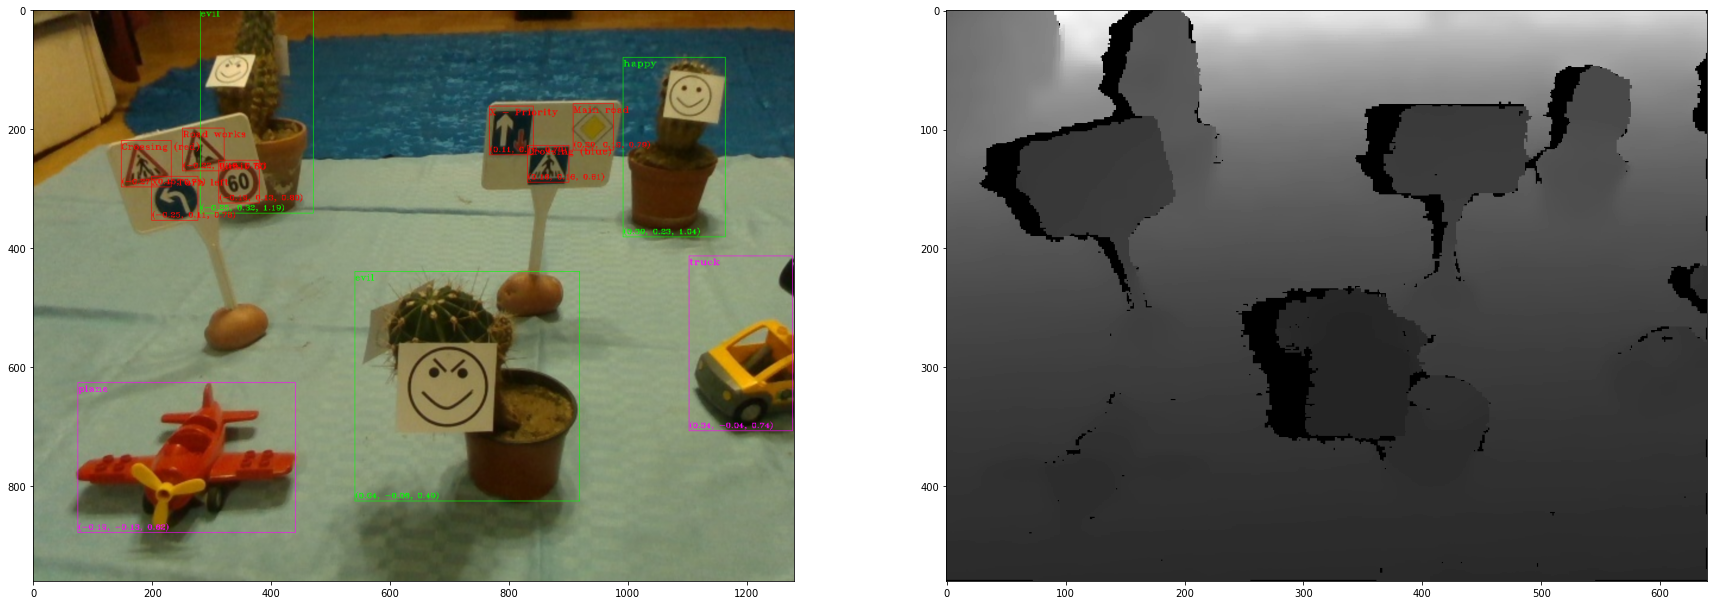

In [0]:
# Display the first images
colors = [(0,0,255),(255,0,255),(0,255,0)]

def drawBBs(BBs, img):
    img = cv2.resize(img, (1280, 960))
    for BB in BBs:
        u = BB[0]*2
        v = BB[1]*2
        w = BB[2]*2
        h = BB[3]*2
        c = BB[4]
        sc = BB[5]
        x = BB[6]
        y = BB[7]
        z = BB[8]
        s = (u - w // 2, v - h // 2)
        e = (u + w // 2, v + h // 2)
        cv2.rectangle(img, s, e, colors[c], 1)
        tl = (s[0], s[1]+15)
        bl = (s[0], e[1]-5)
        cv2.putText(img,subclassNames[c][sc],tl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,colors[c])
        coords = "(%.2f, %.2f, %.2f)" % (x,y,z)
        cv2.putText(img,coords,bl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.65,colors[c])
    
    return img

import pickle
import cv2
import matplotlib.pyplot as plt
#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

# Read images
img = cv2.imread("/content/HW/g1/rgb/1.jpg")
depth = cv2.imread("/content/HW/g1/depth/1.png", -1)

# Read annotations
file = open('/content/HW/annotations.pickle','rb')
annotations = pickle.load(file)

# Visualization
depth = depth / 5000.0
img = drawBBs(annotations["HW/g1/rgb/1.jpg"]["objects"], img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Figure with subplots
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(depth,cmap='gray')

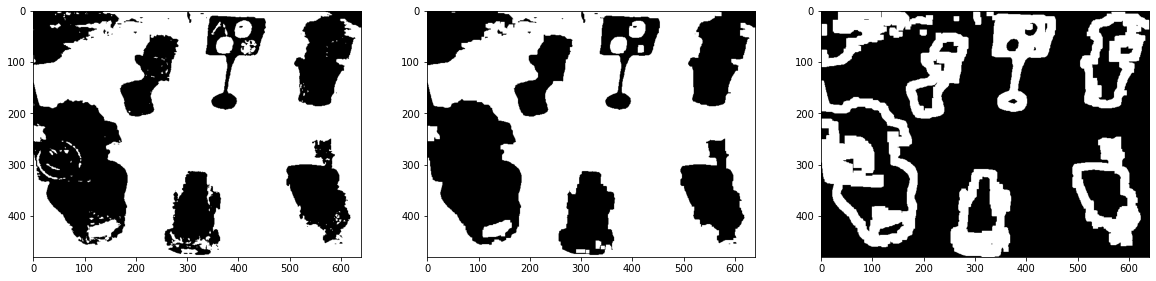

In [0]:
kernel = np.ones((5,5),np.uint8)
nagykernel = np.ones((7,7),np.uint8)
ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

fg = cv2.erode(thresh, kernel,iterations=5)
bg = cv2.dilate(thresh, kernel, iterations=2)

opened = cv2.morphologyEx(hue_channel_segment,cv2.MORPH_OPEN,nagykernel)

unknown = cv2.subtract(bg,fg)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(hue_channel_segment,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(opened,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(unknown,cmap='gray')


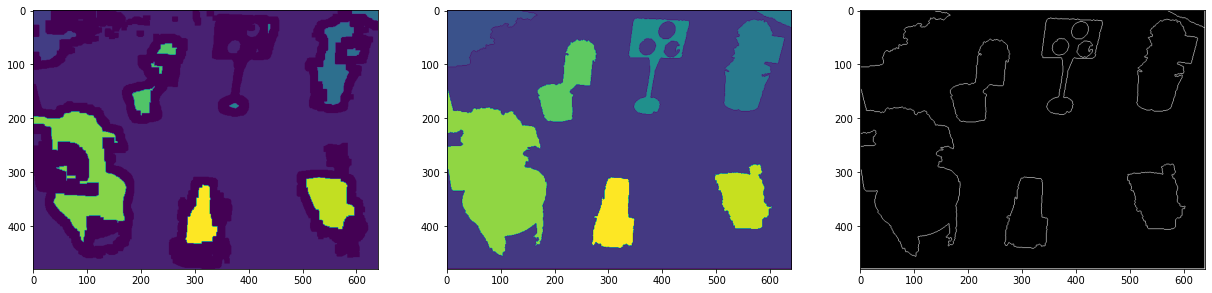

In [0]:
ret, markers = cv2.connectedComponents(bg)
markers=markers+1
markers[unknown==255] = 0
plt.figure(figsize=(21,21))
plt.subplot(1,3,1)
plt.imshow(markers)

imgBGR = cv2.imread("../HW/g3/rgb/136.jpg")

markers = cv2.watershed(imgBGR,markers)
imgBGR[::] =[0,0,0]
imgBGR[markers == -1] = [255,255,255]

plt.subplot(1,3,2)
plt.imshow(markers)
plt.subplot(1,3,3)
plt.imshow(imgBGR)

In [0]:
# markers2 = cv2.cvtColor(markers,cv2.COLOR_BGR2GRAY)

# ret2, thresh2 = cv2.threshold(markers2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# mask = cv2.dnn_SegmentationModel(markers)

# plt.figure(figsize=(21,21))
# plt.imshow(mask)

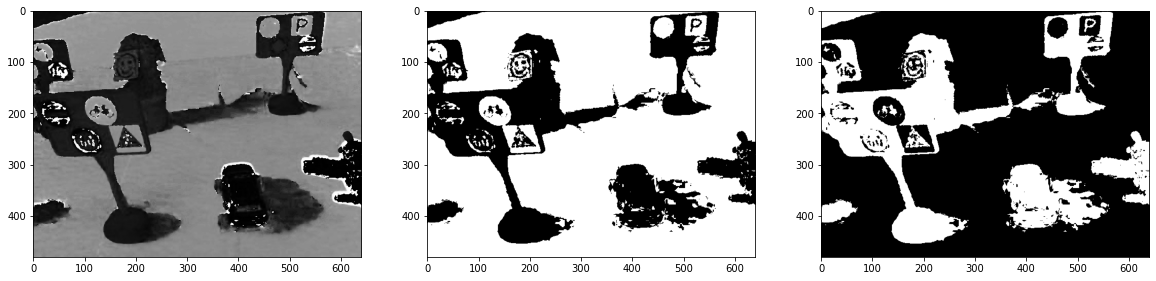

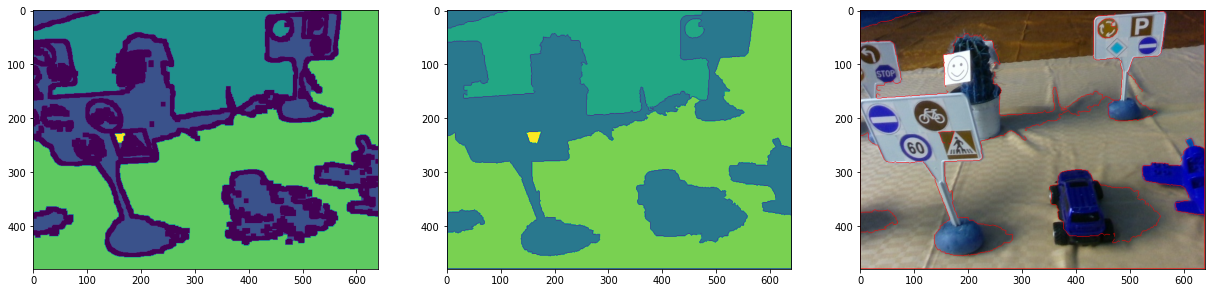

In [0]:
imgBGR = cv2.imread("../HW/g4/rgb/229.jpg") #3 136

imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]

avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue*.4,255,cv2.THRESH_BINARY)
#hue_channel_segment = cv2.adaptiveThreshold(hue_channel,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,101,10)

kernel = np.ones((5,5),np.uint8)
nagykernel = np.ones((7,7),np.uint8)
ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

fg = cv2.erode(thresh, kernel,iterations=2)
bg = cv2.dilate(thresh, kernel, iterations=2)

opened = cv2.morphologyEx(hue_channel_segment,cv2.MORPH_OPEN ,nagykernel,iterations=3)
closed = cv2.morphologyEx(opened             ,cv2.MORPH_CLOSE,nagykernel,iterations=1)

unknown = cv2.subtract(bg,fg)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(hue_channel,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(hue_channel_segment,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(thresh,cmap='gray')


ret, markers = cv2.connectedComponents(closed)
markers=markers+1
markers[unknown==255] = 0
plt.figure(figsize=(21,21))
plt.subplot(1,3,1)
plt.imshow(markers)


markers = cv2.watershed(imgBGR,markers)
#imgBGR[::] =[0,0,0]
imgBGR[markers == -1] = [255,0,0]

plt.subplot(1,3,2)
plt.imshow(markers)
plt.subplot(1,3,3)
plt.imshow(imgBGR)

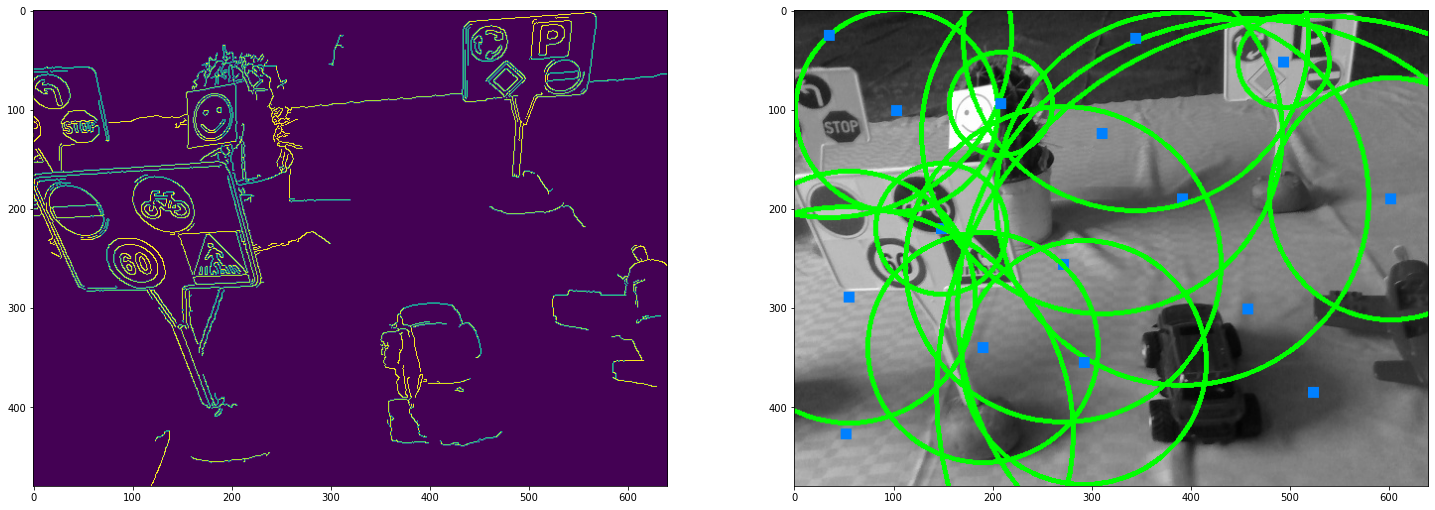

In [0]:
imgBGR = cv2.imread("../HW/g4/rgb/229.jpg") #3 136
imgBGR = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgBGR,50,180)

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT,1.5,100)

# Draw lines on the image
circleIm = cv2.cvtColor(imgBGR,cv2.COLOR_GRAY2BGR)

if circles is not None:
  circles = np.round(circles[0,:]).astype("int")

  for (x,y,r) in circles:
    cv2.circle(circleIm, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(circleIm, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)



plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.imshow(edges)
plt.subplot(1,2,2)
plt.imshow(circleIm)



depth layering

In [0]:
def bgrm(folder, file):
  #folder = "g4"  #g4 38
  #file   = "210"

  imgBGRF = cv2.imread("../HW/"+folder+"/rgb/"+file+".jpg") #3 136
  imgBGRF = cv2.cvtColor(imgBGRF,cv2.COLOR_BGR2RGB)
  imgDepth = cv2.imread("../HW/"+folder+"/depth/"+file+".png")
  '''
  plt.figure(figsize=(21,21))
  plt.imshow(imgBGRF)
'''
  imgDepth_gray = cv2.cvtColor(imgDepth, cv2.COLOR_BGR2GRAY)
  minVal, maxVal, _, _ = cv2.minMaxLoc(imgDepth_gray)    # hol vannak a szélsőértékek
  depth_res=imgDepth_gray
  #˘˘˘definitely not needed for alg
  #cv2.convertScaleAbs(imgDepth_gray,depth_res,255/(maxVal-minVal),-minVal)  # affin -> kép*alfa + béta

  imgDepth2 = imgDepth
  imgnobg = np.ndarray(imgBGRF.shape)
  imgnobg[::] = 1

  heights=[]
  for i in np.unique(depth_res):
    depth_res2 = depth_res.copy()
    depth_res2[depth_res!=i]=0
    lastline=0
    firstline=-1
    for j in range(depth_res2.shape[0]):
      if np.count_nonzero(depth_res2[j,:])>0:
        lastline = j
        if firstline == -1:
          firstline = j
    print("height of layer " + str(i) + " is:" + str(lastline-firstline))
    heights.append(lastline-firstline)

  print(np.mean(heights))

  if heights[i]<np.mean(heights):
      continue
  for i in np.unique(depth_res):
    if (i==0): 
      i=0
    if (i>=7):
      continue

    imgBGR = cv2.imread("../HW/"+folder+"/rgb/"+file+".jpg")
    imgBGR = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
    imgBGR[depth_res != i] = [0,0,0]
    #plt.figure()
    #print(i)
    #plt.imshow(imgBGR)
    #start
    imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV);
    hue_channel = imgHSV[:,:,0]

    avg_hue = hue_channel[np.nonzero(hue_channel)].mean()
    hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
    
    kernel = np.ones((5,5),np.uint8)
    nagykernel = np.ones((7,7),np.uint8)
    ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    fg = cv2.erode(thresh, kernel,iterations=2)
    bg = cv2.dilate(thresh, kernel, iterations=2)

    opened = cv2.morphologyEx(hue_channel_segment,cv2.MORPH_OPEN ,nagykernel,iterations=3)
    closed = cv2.morphologyEx(opened             ,cv2.MORPH_CLOSE,nagykernel,iterations=1)

    unknown = cv2.subtract(bg,fg)
    '''
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(hue_channel,cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(hue_channel_segment,cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(thresh,cmap='gray')
  '''

    ret, markers = cv2.connectedComponents(closed)
    markers=markers+1
    markers[unknown==255] = 0
    
    plt.figure(figsize=(21,21))
    plt.subplot(1,3,1)
    plt.imshow(markers)
  

    markers = cv2.watershed(imgBGR,markers)
    #imgBGR[::] =[0,0,0]
    imgBGR[markers == -1] = [255,0,0]
    
    plt.subplot(1,3,2)
    plt.imshow(markers)
    plt.subplot(1,3,3)
    plt.imshow(imgBGR)
  
    for i in np.unique(markers):
      #imgnobg = np.add(imgBGR[markers == i],imgnobg[markers == i])
      imgnobg[markers != 1] = 0
      

  #imgnobgimg = cv2.imread("../HW/"+folder+"/rgb/"+file+".jpg")
  imgnobgimg = np.where(imgnobg == 0, imgBGRF, [0,0,0])

  '''
  plt.figure(figsize=(21,21))
  plt.imshow(imgnobgimg)
  '''
  #final proc
  return imgnobgimg




height of layer 0 is:1
height of layer 1 is:326
height of layer 2 is:473
height of layer 3 is:215
height of layer 4 is:92
height of layer 5 is:97
height of layer 6 is:84
height of layer 7 is:67
height of layer 8 is:48
height of layer 9 is:34
height of layer 10 is:27
height of layer 11 is:21
123.75
151 392 133 64
piros
359 323 202 111
piros
0 188 295 118
100 160 63 65
296 150 242 82
0 112 640 368
sarga
piros
piros
4 59 71 83
155 48 241 154
455 5 104 99


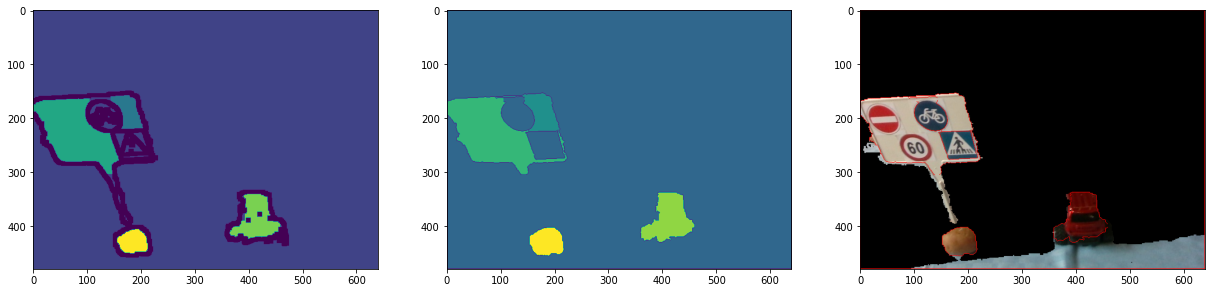

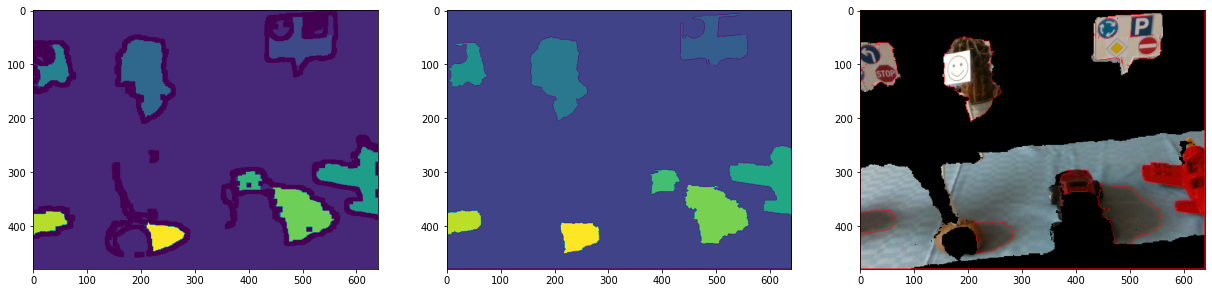

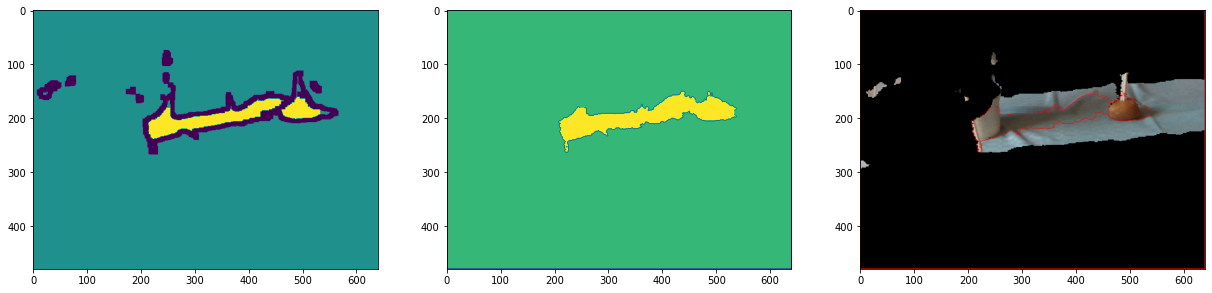

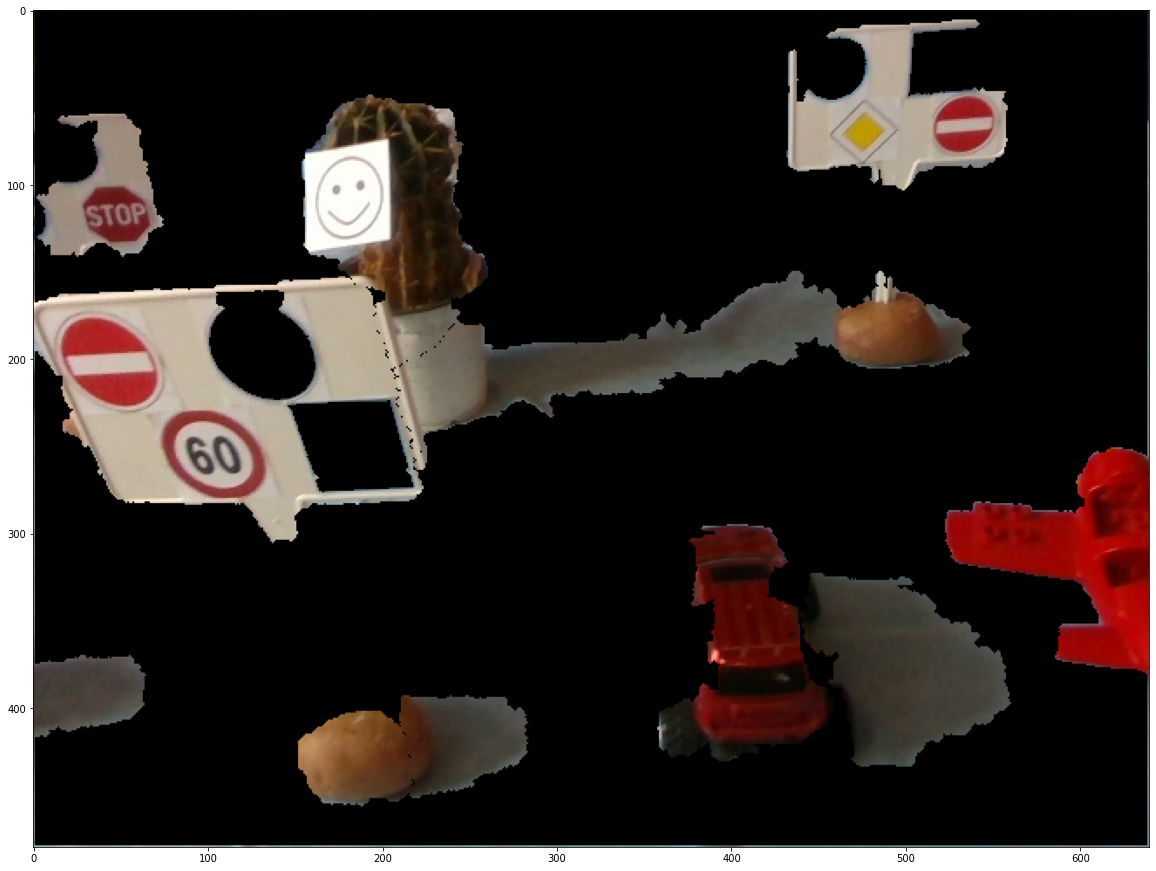

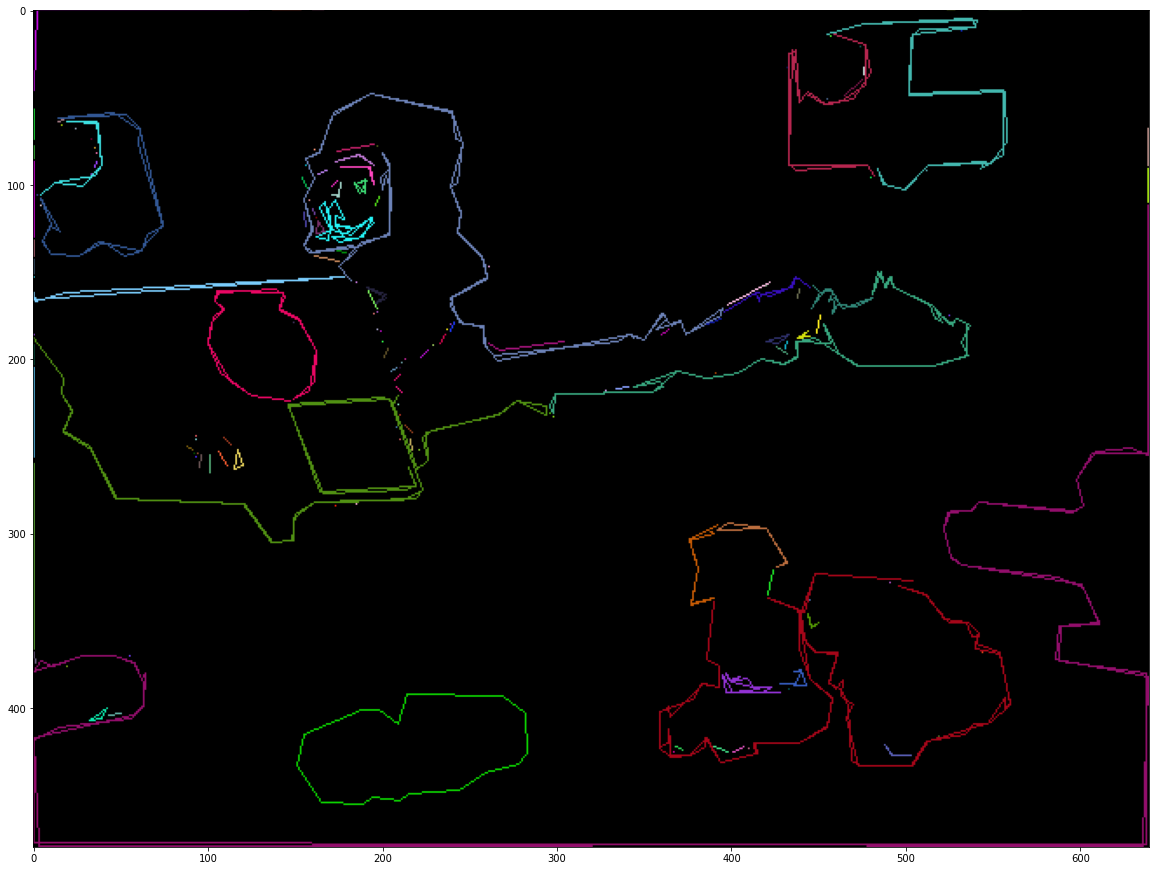

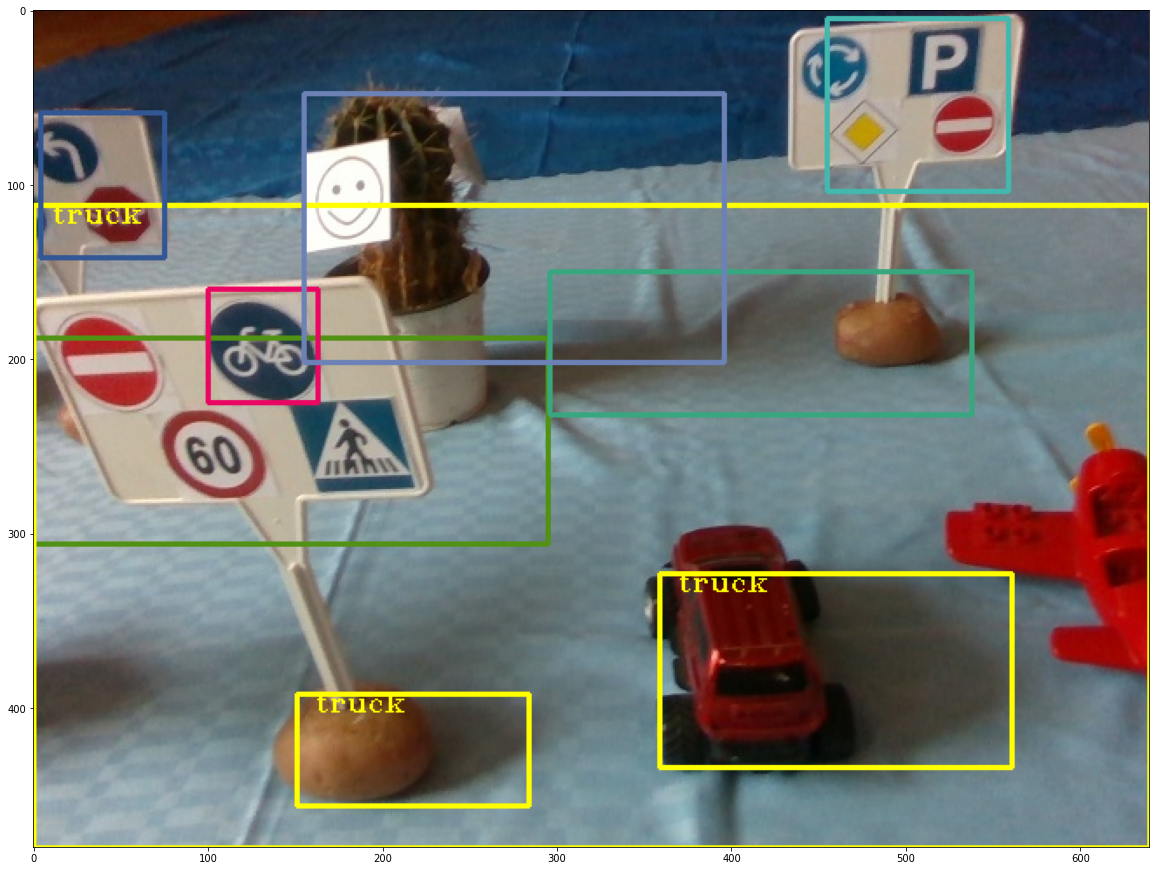

In [95]:
import random as rng
import copy
rng.seed(12345)

cropped2=[]

colvalue = 7

smask = 1
shist = 2
rmask = 3
rhist = 4
zmask = 5
hhist = 6
kep = 7

folder = "g4"  #g4 38
file   = "229"

bgrmvd = bgrm(folder,file)
plt.figure(figsize=(20,20))
plt.imshow(bgrmvd)

imgBGR = cv2.imread("../HW/"+folder+"/rgb/"+file+".jpg")

kimenet = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
dilation = cv2.cvtColor(np.float32(bgrmvd), cv2.COLOR_BGR2HSV)
dilation = dilation[:,:,0]

def thresh_callback(val):

    threshold = val
    
    canny_output = cv2.Canny(np.uint8(dilation), threshold, threshold * 2)
    
    
    contours, _ = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
    
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    plt.figure(figsize=(20,20))
    
    subos= len(contours);
    
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv2.drawContours(drawing, contours_poly, i, color)
        
        if (int(boundRect[i][2]) > 50) & (int(boundRect[i][3]) > 50):
          cv2.rectangle(kimenet, (int(boundRect[i][0]), int(boundRect[i][1])), \
            (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
          
          print(str(int(boundRect[i][0]))+" "+str(int(boundRect[i][1]))+" "+str(int(boundRect[i][2]))+" "+str(int(boundRect[i][3])))
          cropped2=kimenet[boundRect[i][1]:boundRect[i][1]+boundRect[i][3],boundRect[i][0]:boundRect[i][0]+boundRect[i][2]]
          #hist = cv2.calcHist([cropped2],[0],None,[256],[0,256])
         # plt.subplot(subos,6,(i*6)+1)
         # plt.imshow(rgbimg,cmap='gray')

          ranges = [
            [[180,150,0],   [255,255,120], "sarga"],
            [[100,0,0],     [255,50,50],   "piros"],
            [[60,60,0],     [140,140,50],  "piros"],
            [[20,20,50],    [50,50,200],   "kek"],     
          ]

          for item in ranges:
            lower_range = np.array(item[0])
            upper_range = np.array(item[1])
            text        =          item[2]

            maszk=cv2.inRange(cropped2, lower_range, upper_range)
            #plt.subplot(subos,6,(i*6)+2)
            #plt.imshow(maszk,cmap='gray')
            hist2 = cv2.calcHist([maszk],[0],None,[256],[0,256])
            #plt.subplot(subos,6,(i*6)+3)
            #plt.bar(np.arange(256),hist2[:,0])
            if (hist2[255] > 1000):
              print(text)
              cv2.putText(kimenet,"truck",(boundRect[i][0]+10,boundRect[i][1]+10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,(255,255,0))
              cv2.rectangle(kimenet, (int(boundRect[i][0]), int(boundRect[i][1])), \
              (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), (255,255,0), 2)
            #plt.imshow(rgbimg[boundRect[i][0]:boundRect[i][0]+boundRect[i][2],boundRect[i][1]:boundRect[i][1]+boundRect[i][3]],cmap='gray')

         
    
    plt.imshow(drawing)
    #plt.subplot(rowSubplot,colSubplot,12)
    
    plt.figure(figsize=(20,20))
    plt.imshow(kimenet,cmap='gray')
    

thresh = 100 # initial threshold
thresh_callback(thresh)

[[[  5 217  61]
  [  5 217  61]
  [  5 211  64]
  ...
  [113 151  64]
  [113 159  64]
  [113 162  63]]

 [[  5 217  61]
  [  7 226  61]
  [  5 215  63]
  ...
  [113 156  62]
  [113 162  63]
  [113 165  62]]

 [[  7 221  60]
  [  7 234  61]
  [  6 226  62]
  ...
  [112 171  61]
  [114 165  65]
  [114 165  65]]

 ...

 [[ 98  39 177]
  [ 98  38 182]
  [ 98  39 178]
  ...
  [103  52 142]
  [103  52 142]
  [103  50 147]]

 [[ 98  38 181]
  [ 98  38 182]
  [ 98  38 179]
  ...
  [103  51 144]
  [103  51 144]
  [103  51 146]]

 [[ 98  37 184]
  [ 98  38 182]
  [ 98  38 180]
  ...
  [103  50 147]
  [103  50 147]
  [103  50 147]]]


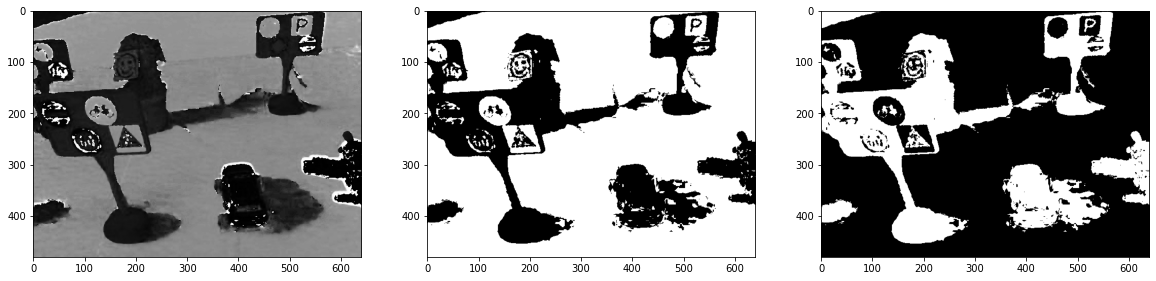

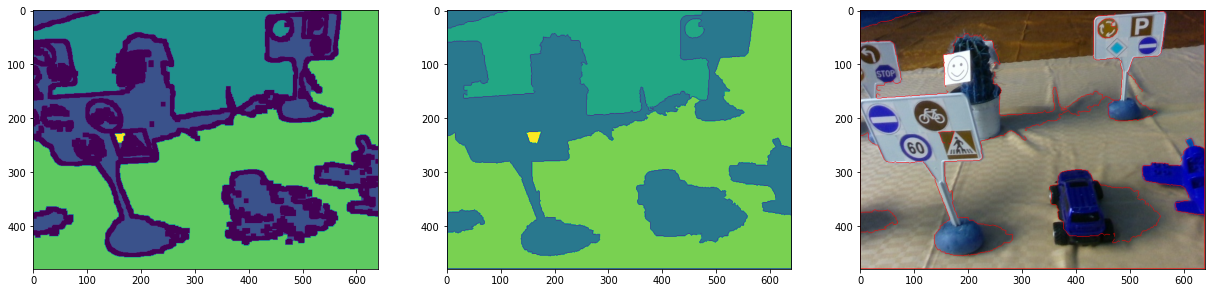

In [0]:
imgBGR = cv2.imread("../HW/g4/rgb/229.jpg") #3 136
imgDepth = cv2.imread("../HW/g4/depth/229.png") #3 136

imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]

avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue*.4,255,cv2.THRESH_BINARY)
#hue_channel_segment = cv2.adaptiveThreshold(hue_channel,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,101,10)

kernel = np.ones((5,5),np.uint8)
nagykernel = np.ones((7,7),np.uint8)
ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

fg = cv2.erode(thresh, kernel,iterations=2)
bg = cv2.dilate(thresh, kernel, iterations=2)

opened = cv2.morphologyEx(hue_channel_segment,cv2.MORPH_OPEN ,nagykernel,iterations=3)
closed = cv2.morphologyEx(opened             ,cv2.MORPH_CLOSE,nagykernel,iterations=1)

unknown = cv2.subtract(bg,fg)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(hue_channel,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(hue_channel_segment,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(thresh,cmap='gray')


ret, markers = cv2.connectedComponents(closed)
markers=markers+1
markers[unknown==255] = 0
plt.figure(figsize=(21,21))
plt.subplot(1,3,1)
plt.imshow(markers)


markers = cv2.watershed(imgBGR,markers)
#imgBGR[::] =[0,0,0]
imgBGR[markers == -1] = [255,0,0]

plt.subplot(1,3,2)
plt.imshow(markers)
plt.subplot(1,3,3)
plt.imshow(imgBGR)

[1, 0, 300, 253, 78, 160, 57, 37, 30, 46, 41, 27, 0]
79.23076923076923


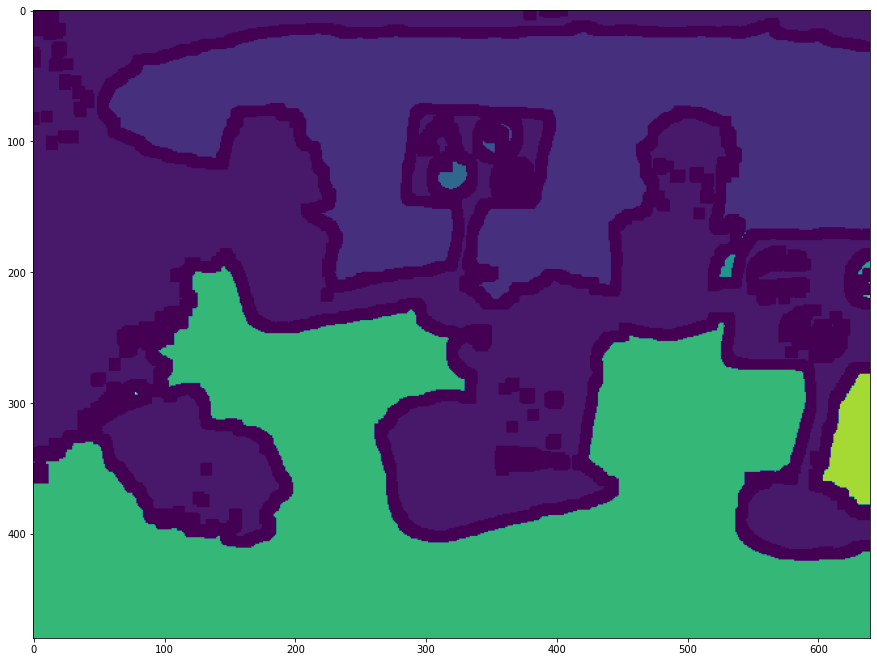

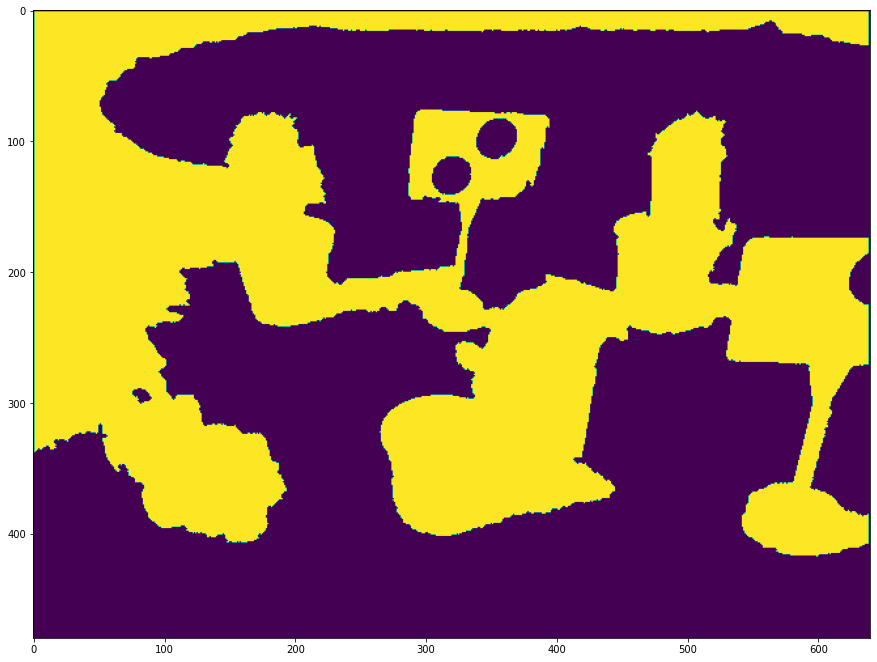

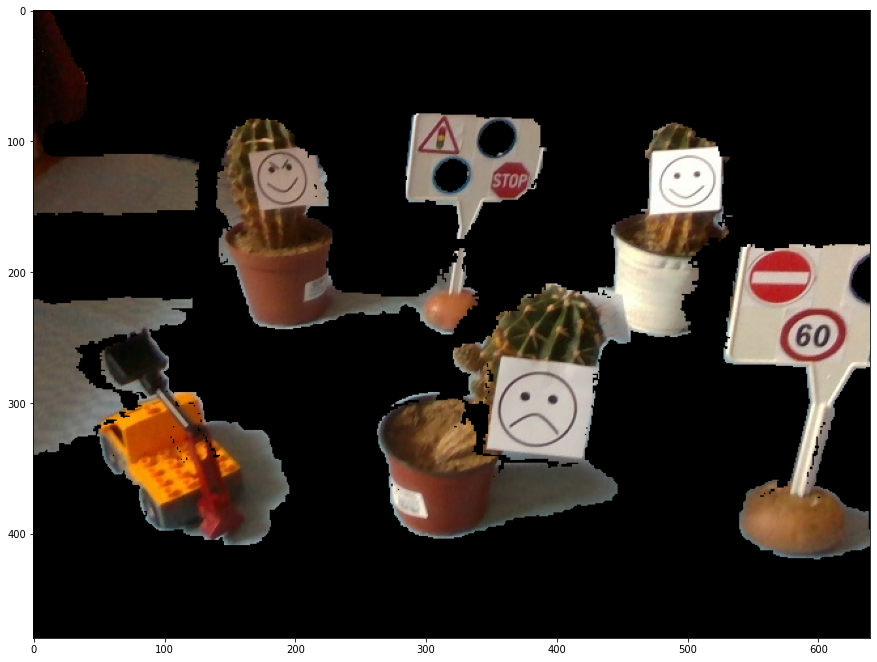

In [180]:
def bgrmv(folder, file):
  #folder = "g4"  #g4 38
  #file   = "210"

  imgBGRF = cv2.imread("../HW/"+folder+"/rgb/"+file+".jpg") #3 136
  imgBGRF = cv2.cvtColor(imgBGRF,cv2.COLOR_BGR2RGB)
  imgDepth = cv2.imread("../HW/"+folder+"/depth/"+file+".png")

  imgDepth_gray = cv2.cvtColor(imgDepth, cv2.COLOR_BGR2GRAY)
  minVal, maxVal, _, _ = cv2.minMaxLoc(imgDepth_gray)    # hol vannak a szélsőértékek
  depth_res=imgDepth_gray

  imgDepth2 = imgDepth
  imgnobg = np.ndarray(imgBGRF.shape)
  imgnobg[::] = 1

  heights=[]
  layers = np.unique(depth_res)
  for i in layers:
    depth_res2 = depth_res.copy()
    depth_res2[depth_res!=i]=0
    lastline=0
    firstline=-1
    for j in range(depth_res2.shape[0]):
      if np.count_nonzero(depth_res2[j,:])>0:
        lastline = j
        if firstline == -1:
          firstline = j
    while len(heights)-i<0:
      heights.append(0)
    heights.append(lastline-firstline)

  print(heights)
  print(np.mean(heights))
  badlayers=[]
  for i in layers:
    if heights[i]<np.mean(heights)*1.5:
      badlayers.append(i)
  
  imgnobg = imgBGRF.copy()
  for i in badlayers:
    imgnobg[depth_res==i]=[0,0,0]

  img = cv2.imread("../HW/"+folder+"/rgb/"+file+".jpg")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
  imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV);
  hue_channel = imgHSV[:,:,0]
  avg_hue = np.average(hue_channel)

  hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
  hue_channel_segment = cv2.bitwise_not(hue_channel_segment)
  ret, thresh = cv2.threshold(hue_channel_segment,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  kernel = np.ones((5,5),np.uint8)

  sure_fg = cv2.erode(thresh,kernel,iterations=2)

  sure_bg = cv2.dilate(thresh,kernel,iterations=2)

  unknown = cv2.subtract(sure_bg,sure_fg)
  ret, marker = cv2.connectedComponents(sure_fg)

  marker = marker+1

  marker[unknown==255] = 0

  plt.figure(figsize=(15,15))
  plt.imshow(marker)

  marked = cv2.watershed(img, marker)

  marked[marked == -1] = 255
  marked[marked > 1] = 0

  plt.figure(figsize=(15,15))
  plt.imshow(marked)

  kernel = np.ones((5,5),np.uint8)
  dilation = cv2.dilate(marked.astype(np.float32), kernel, iterations = 1)

  final_img = cv2.bitwise_and(img, imgnobg, mask=dilation.astype(np.uint8))
  plt.figure(figsize=(15,15))
  plt.imshow(final_img)

bgrmv("g4","38")

